In [1]:
import numpy as np
from utils.ifa_meander_project.meander_function import *

In [2]:
mesh_name = "ifa_meander_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [3]:
fC      = 868e6
fLow    = 820e6
fHigh   = 940e6
nPoints = calculate_nPoints(fLow, fHigh, fC)
accuracy= 0.01
print(f"nPoints = {nPoints}")

nPoints = 6


In [4]:
vitesse_lumiere = 3.0e8  # en mètres par seconde (m/s)
longueur_onde = vitesse_lumiere / fC 
quart_d_onde = longueur_onde / 4

print(f"Pour la fréquence de raisonnance {fC} Hz :")
print(f"Longueur d'onde (λ) = {longueur_onde} m")
print(f"Quart d'onde (λ/4) = {quart_d_onde} m")

Pour la fréquence de raisonnance 868000000.0 Hz :
Longueur d'onde (λ) = 0.3456221198156682 m
Quart d'onde (λ/4) = 0.08640552995391705 m


In [5]:
frequencies = np.linspace(fLow, fHigh, nPoints)
print("Liste des frequences : ")
count = 1
for frequency in frequencies:
    print(f"Simulation Numéro {count} = {frequency / 1e6:.2f} MHz")
    count += 1

Liste des frequences : 
Simulation Numéro 1 = 820.00 MHz
Simulation Numéro 2 = 844.00 MHz
Simulation Numéro 3 = 868.00 MHz
Simulation Numéro 4 = 892.00 MHz
Simulation Numéro 5 = 916.00 MHz
Simulation Numéro 6 = 940.00 MHz


In [6]:
# Terminal size 
t_a = 50 / 1000   # Hauteur
a = 15 / 1000 
t_b = 30 / 1000  # Largeur
b = t_b
x_t = np.array([-t_a, 0, 0, -t_a])
y_t = np.array([t_b/2, t_b/2, -t_b/2, -t_b/2])

In [7]:
# Génération des points du contour IFA
# wid has to be less than min_slot       
# wid = 1.075 / 1000    # Largeur des branches

wid = 1 / 1000    # Largeur des branches

L_short = 1.15 / 1000
Lenght_antenna = quart_d_onde

# feed_wid = 1 / 1000
feed_wid = wid

distance_short = t_b/2
# distance_short = 1 / 1000 + wid
# distance_short = 7.77 / 1000

feed = t_b/2 - distance_short

# feed_point = [0, t_b/2 - wid/2, 0]
feed_point = [0, feed, 0]

x, y = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)
s11_db, f_resonance, has_converged = simulate_freq_loop(fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point)
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)


In [8]:
def run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat):
    # Affiche l'iteration
    print(f"\nIteration {iteration + 1}\n")
    print(f"wid = {wid * 1000}")
    print(f"short feed = {distance_short * 1000}\n")
    # x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)


def update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b):
    distance_short = new_distance_short
    print(f"\n2...........short feed = {distance_short * 1000}")
    wid = new_wid
    feed = t_b/2 - distance_short
    feed_wid = wid
    feed_point = [0, feed, 0]
    # Si new_Nombre_meandre est None ou non fourni, ne pas le retourner
    if new_Nombre_meandre is not None:
        return distance_short, wid, new_Nombre_meandre, feed, feed_wid, feed_point
    else:
        return distance_short, wid, feed, feed_wid, feed_point


Number of meanders 2
distance meandres 0.006925
last index = 5

longueur_obtenue = 0.064925
longueur_desiree = 0.08640552995391705 


Iteration 1

wid = 1.0
short feed = 15.0

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -0.10142190903837334 db

Simulation Numéro 2

paramètre S11 = -0.13371502397772922 db

Simulation Numéro 3



paramètre S11 = -0.17776763331548256 db

Simulation Numéro 4

paramètre S11 = -0.23886612959224204 db

Simulation Numéro 5

paramètre S11 = -0.32530755240540843 db

Simulation Numéro 6

paramètre S11 = -0.45054558569459613 db

R_I_min_index = 8.97360907880848

Fréquence de résonance : 940.00 MHz

f_resonance > fC

new_Nombre_meandre = 5

new_wid = 0.6029325707432022

 Pas de convergence : |f_res - fC| = 0.08 Hz > 0.01

1...........short feed ...... dans la fonction = 15.0


2...........short feed = 15.0


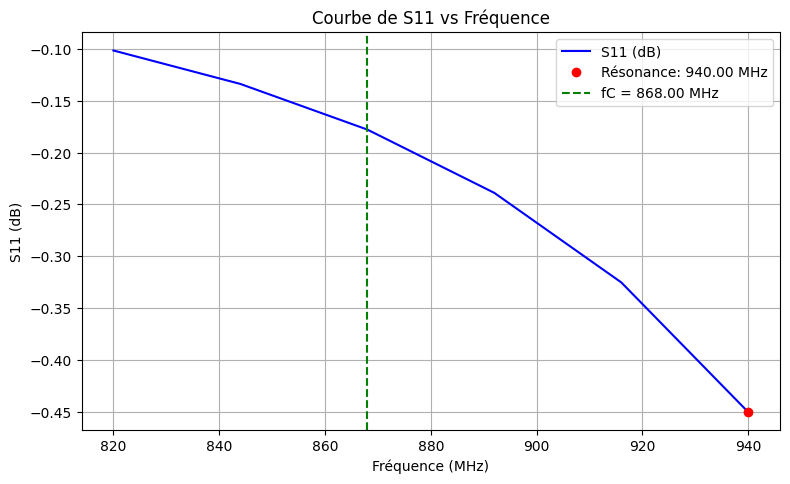

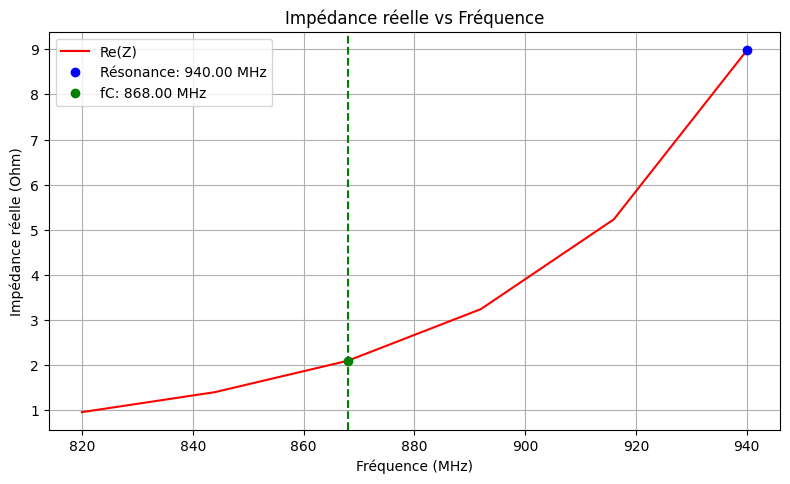

Number of meanders 5
distance meandres 0.00277
last index = 11

longueur_obtenue = 0.14975533714628397
longueur_desiree = 0.08640552995391705 


Iteration 2

wid = 0.6029325707432022
short feed = 15.0

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -7.045838528250402 db

Simulation Numéro 2

paramètre S11 = -2.953414270089821 db

Simulation Numéro 3



paramètre S11 = -1.236957730465213 db

Simulation Numéro 4

paramètre S11 = -0.667823017424489 db

Simulation Numéro 5

paramètre S11 = -0.42217743096584986 db

Simulation Numéro 6

paramètre S11 = -0.29436839856969743 db

R_I_min_index = 25.791052005341644

Fréquence de résonance : 820.00 MHz

f_resonance < fC

new_Nombre_meandre = 4

new_wid = 0.6755857661802891

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 15.0


2...........short feed = 15.0


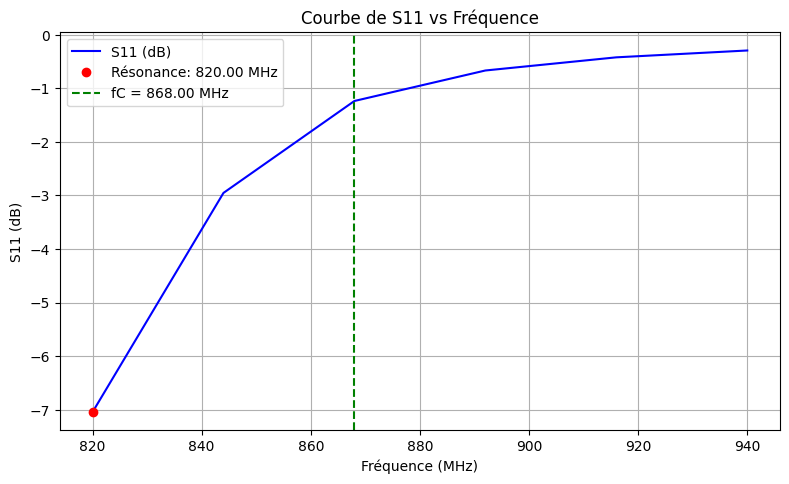

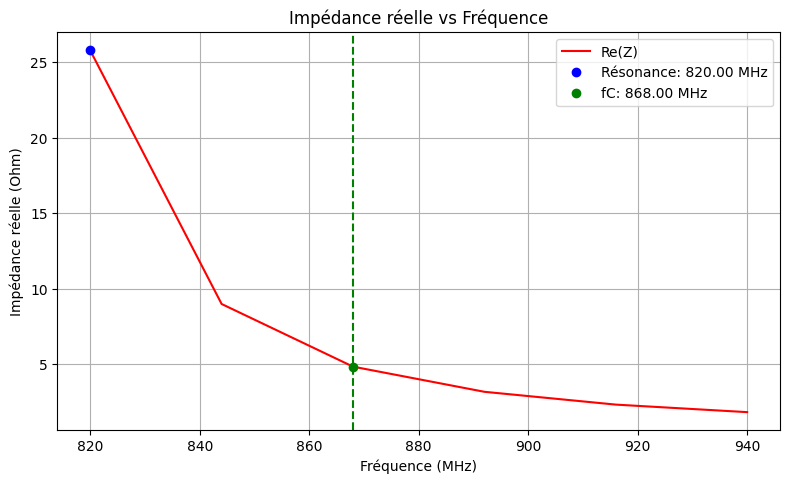

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12076015693527883
longueur_desiree = 0.08640552995391705 


Iteration 3

wid = 0.6755857661802891
short feed = 15.0

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully
Simulation Numéro 1

paramètre S11 = -0.9832349258091676 db

Simulation Numéro 2

paramètre S11 = -2.2768415911273494 db

Simulation Numéro 3



paramètre S11 = -5.927116766744884 db

Simulation Numéro 4

paramètre S11 = -6.445548775811886 db

Simulation Numéro 5

paramètre S11 = -2.8795873035866264 db

Simulation Numéro 6

paramètre S11 = -1.4732384928338056 db

R_I_min_index = 18.116585801558582

Fréquence de résonance : 892.00 MHz


2...........short feed = 15.0


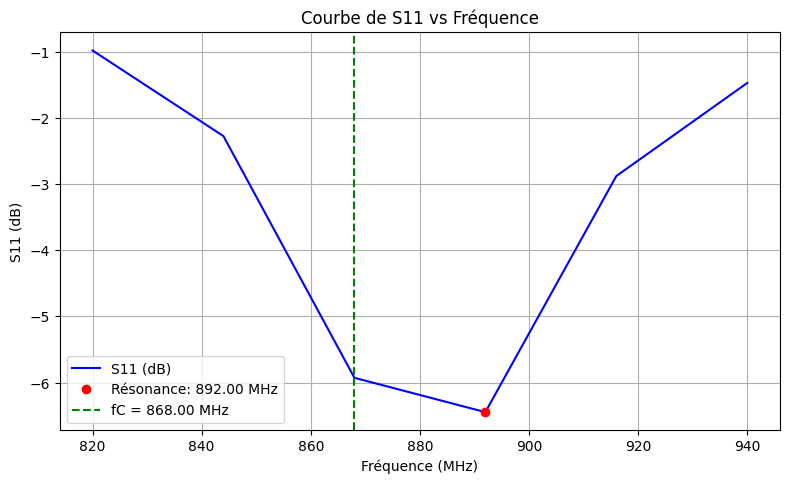

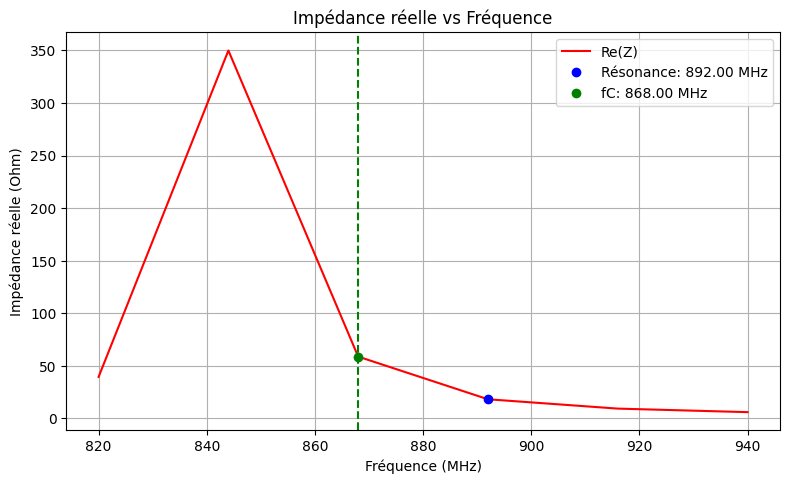

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12076015693527883
longueur_desiree = 0.08640552995391705 

On est dans la plage de convergence

Iteration 3

wid = 0.6755857661802891
short feed = 15.0

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.9832349258091676 db

Simulation Numéro 2

paramètre S11 = -2.2768415911273494 db

Simulation Numéro 3



paramètre S11 = -5.927116766744884 db

Simulation Numéro 4

paramètre S11 = -6.445548775811886 db

Simulation Numéro 5

paramètre S11 = -2.8795873035866264 db

Simulation Numéro 6

paramètre S11 = -1.4732384928338056 db

R_I_min_index = 18.116585801558582

Fréquence de résonance : 892.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.360279552300195

 Pas de convergence : |f_res - fC| = 0.03 Hz > 0.01

1...........short feed ...... dans la fonction = 29.360279552300195


2...........short feed = 29.360279552300195


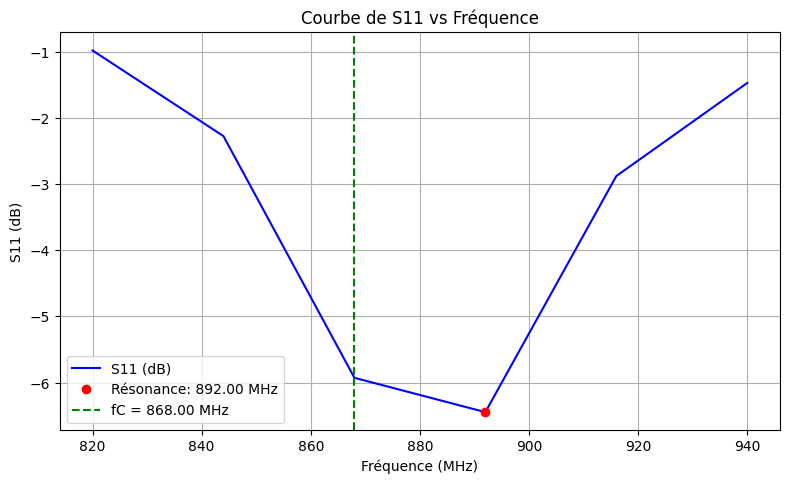

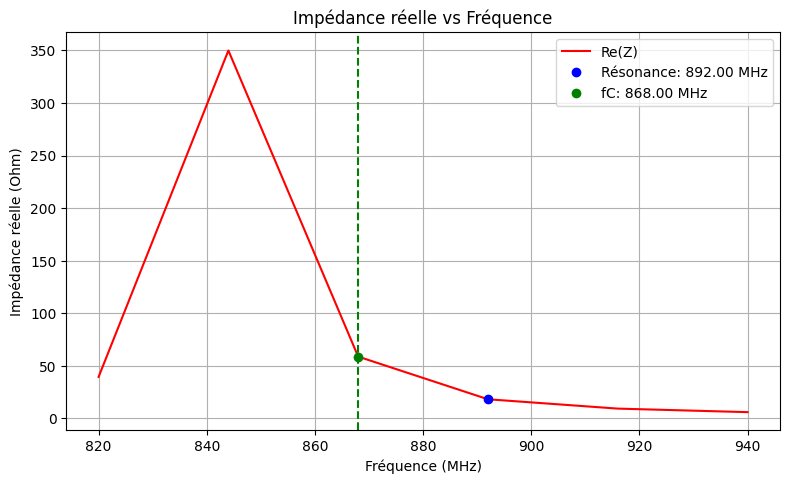

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12090361820920077
longueur_desiree = 0.08640552995391705 


Iteration 4

wid = 0.6397204476998056
short feed = 29.360279552300195

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.494036657627862 db

Simulation Numéro 2

paramètre S11 = -0.8484297128362004 db

Simulation Numéro 3



paramètre S11 = -1.6147174385529794 db

Simulation Numéro 4

paramètre S11 = -3.4595636701488592 db

Simulation Numéro 5

paramètre S11 = -6.934775467975313 db

Simulation Numéro 6

paramètre S11 = -5.61334541470695 db

R_I_min_index = 24.448364696871725

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.425567854126804

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 29.425567854126804


2...........short feed = 29.425567854126804


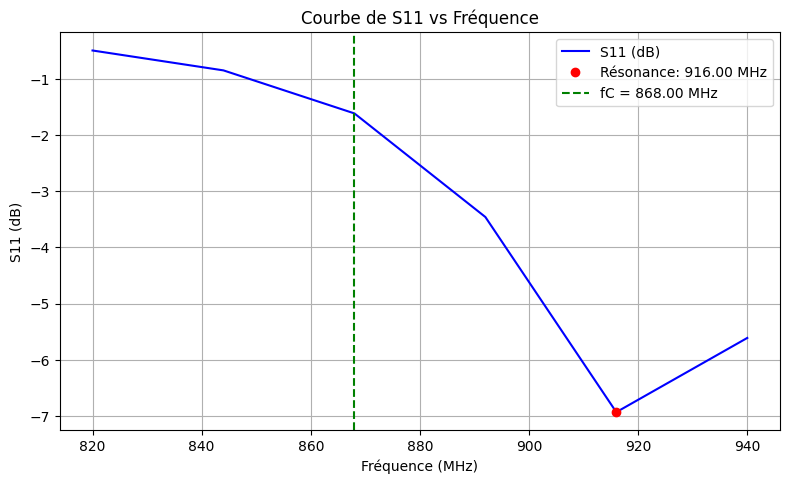

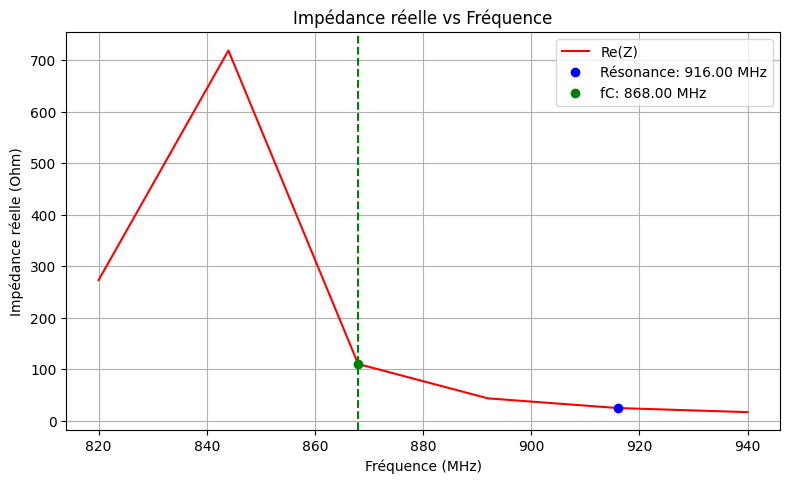

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12116477141650721
longueur_desiree = 0.08640552995391705 


Iteration 5

wid = 0.5744321458731936
short feed = 29.425567854126804

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.5636998507961243 db

Simulation Numéro 2

paramètre S11 = -0.9985216382510108 db

Simulation Numéro 3



paramètre S11 = -1.977153668829075 db

Simulation Numéro 4

paramètre S11 = -4.32503006415226 db

Simulation Numéro 5

paramètre S11 = -7.028630964397866 db

Simulation Numéro 6

paramètre S11 = -4.334292955545046 db

R_I_min_index = 20.25778241210213

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.484192991799873

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 29.484192991799873


2...........short feed = 29.484192991799873


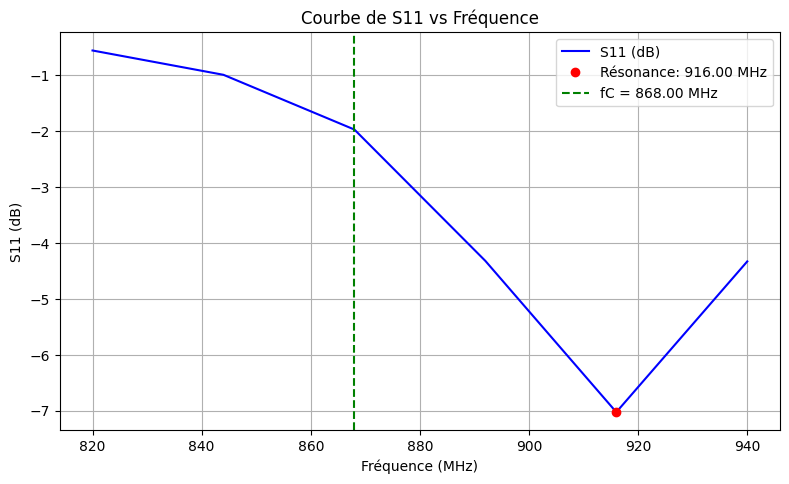

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12139927196719949
longueur_desiree = 0.08640552995391705 


Iteration 6

wid = 0.515807008200126
short feed = 29.484192991799873

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.6334041744770279 db

Simulation Numéro 2

paramètre S11 = -1.1520195301901095 db

Simulation Numéro 3



paramètre S11 = -2.3508599421479723 db

Simulation Numéro 4

paramètre S11 = -5.078268985124437 db

Simulation Numéro 5

paramètre S11 = -6.397285136690492 db

Simulation Numéro 6

paramètre S11 = -3.511172176123551 db

R_I_min_index = 17.638824567052527

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.5

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 29.5


2...........short feed = 29.5


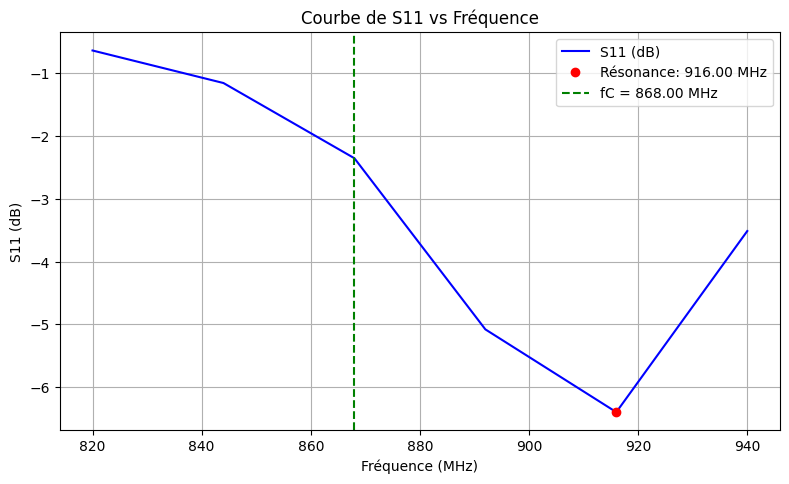

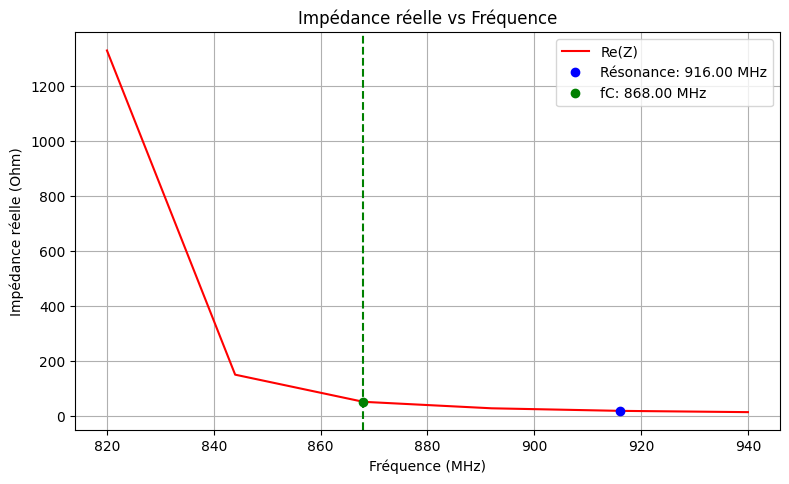

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12146249999999999
longueur_desiree = 0.08640552995391705 


Iteration 7

wid = 0.5
short feed = 29.5

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.653123857837133 db

Simulation Numéro 2

paramètre S11 = -1.1960495329681957 db

Simulation Numéro 3



paramètre S11 = -2.4579782167113025 db

Simulation Numéro 4

paramètre S11 = -5.259643019957183 db

Simulation Numéro 5

paramètre S11 = -6.176360418724319 db

Simulation Numéro 6

paramètre S11 = -3.3324579647425177 db

R_I_min_index = 17.069333238030623

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.5

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 29.5


2...........short feed = 29.5


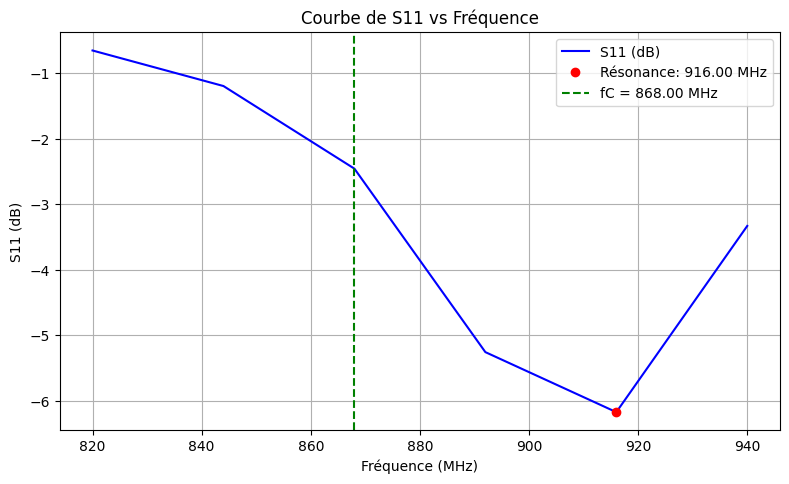

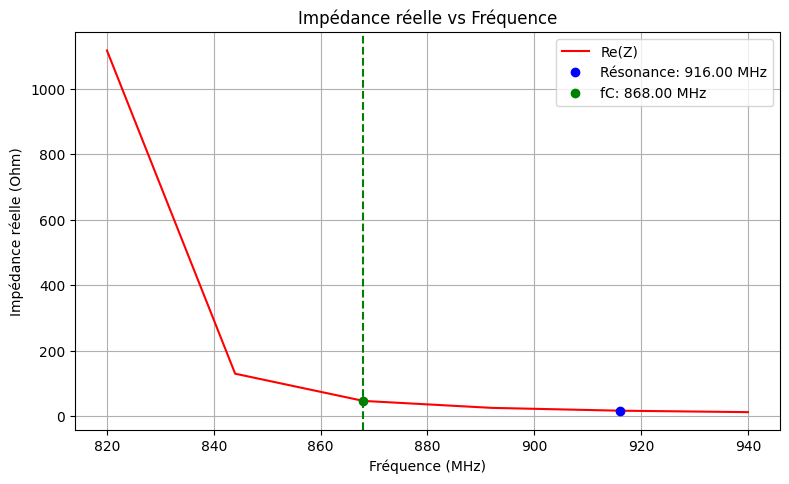

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12146249999999999
longueur_desiree = 0.08640552995391705 


Iteration 8

wid = 0.5
short feed = 29.5

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.653123857837133 db

Simulation Numéro 2

paramètre S11 = -1.1960495329681957 db

Simulation Numéro 3



paramètre S11 = -2.4579782167113025 db

Simulation Numéro 4

paramètre S11 = -5.259643019957183 db

Simulation Numéro 5

paramètre S11 = -6.176360418724319 db

Simulation Numéro 6

paramètre S11 = -3.3324579647425177 db

R_I_min_index = 17.069333238030623

Fréquence de résonance : 916.00 MHz

f_resonance > fLow and f_resonance < fHigh

new_distance_short > DSF_max

new_distance_short = 29.5

 Pas de convergence : |f_res - fC| = 0.06 Hz > 0.01

1...........short feed ...... dans la fonction = 29.5


2...........short feed = 29.5


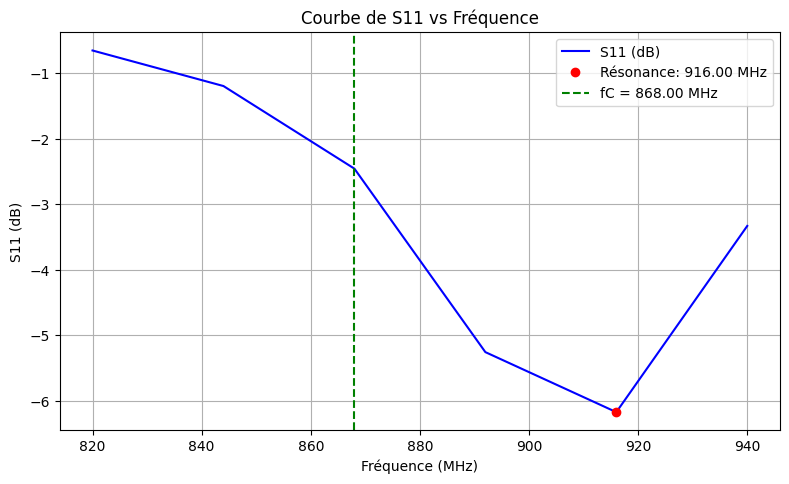

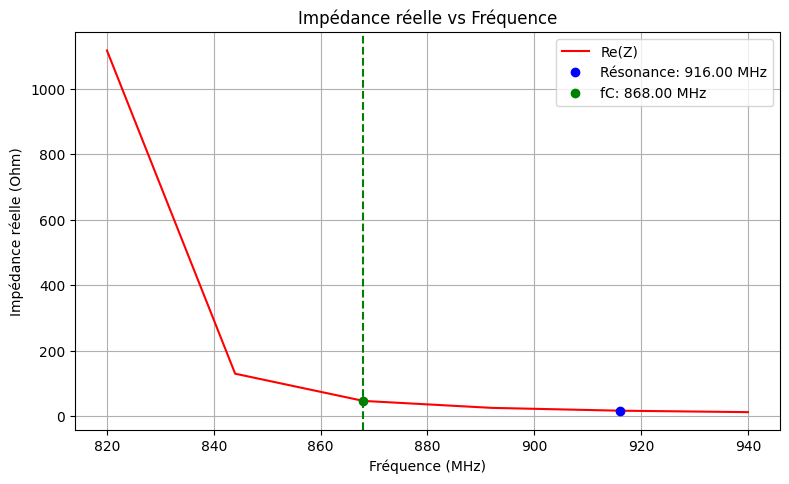

Number of meanders 4
distance meandres 0.0034625
last index = 9

longueur_obtenue = 0.12146249999999999
longueur_desiree = 0.08640552995391705 


Iteration 9

wid = 0.5
short feed = 29.5

The .msh file was successfully saved to: 'data/gmsh_files/ifa_meander_2.msh'
matlab file stored in data/antennas_mesh/ifa_meander_2.mat successfully

############### loop_in_interval ###############################

Simulation Numéro 1

paramètre S11 = -0.653123857837133 db

Simulation Numéro 2

paramètre S11 = -1.1960495329681957 db

Simulation Numéro 3



In [ ]:
has_converged = False
max_iterations = 15

x, y, Nombre_meandre = ifa_creation_new(Lenght_antenna, a, b, wid, L_short)

# Nombre_meandre = 6

# Loop for simulation
iteration = 0
while not has_converged and iteration < max_iterations:

    run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

    s11_db, f_resonance, new_distance_short, new_wid, new_Nombre_meandre, has_converged, impedances = simulate_freq_loop_test(
        fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, Lenght_antenna, b, a, L_short, Nombre_meandre)
    
    # Remplacement par appel de la fonction update_ifa_meander_params
    distance_short, wid, Nombre_meandre, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b)

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    iteration += 1

    if has_converged:
        iteration_optimised = iteration - 1
        print(f"On est dans la plage de convergence")
        # appel de la fonction qui met à jour les paramètres
        has_optimised = False
        while not has_optimised:

            run_ifa_meander_simulation(iteration_optimised, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

            s11_db, f_resonance, new_distance_short, new_wid, has_optimised, impedances = loop_in_interval(
            fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, b)

            distance_short, wid, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, None, t_b)

            plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
            plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)
            x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
            iteration_optimised += 1


